In [14]:
import pandas as pd
# Imports
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import KernelPCA



from sklearn.model_selection import KFold
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# Load the data from CSV files into DataFrames
zone_data_1A = pd.read_csv('zone_data_1A_clustered.csv')
zone_data_7 = pd.read_csv('zone_data_7_clustered.csv')
zone_data_6 = pd.read_csv('zone_data_6_clustered.csv')

# Separate zone_data_1A into two different DataFrames based on the cluster assignment
zone_data_1A_top = zone_data_1A[zone_data_1A['Cluster'] == 0]
zone_data_1A_bottom = zone_data_1A[zone_data_1A['Cluster'] == 1]

print(zone_data_1A_top)

# Copy the data to avoid SettingWithCopyWarning
zone_data_1A_top_sorted = zone_data_1A_top.copy()
zone_data_1A_bottom_sorted = zone_data_1A_bottom.copy()

# Order the data by 'Create_date_ordinal' from lowest to highest
zone_data_1A_top_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)
zone_data_1A_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)



         Status Application Creation Date Approved / Refused Date  \
0      Recorded                2013-12-07              24/07/2013   
2      Recorded                2018-04-13              26/04/2018   
6       Refused                2009-12-15              16/12/2009   
7      Recorded                2011-02-09              05/09/2011   
9      Recorded                2017-06-21              26/06/2017   
...         ...                       ...                     ...   
18106  Recorded                2023-08-28              06/09/2023   
18107  Recorded                2012-12-21              24/12/2012   
18109  Recorded                2020-01-09              08/09/2020   
18111  Recorded                2020-01-15              17/02/2020   
18113  Recorded                2020-10-12              12/01/2021   

      Recorded / Rejected Date Water Share ID Water System Source Reliability  \
0                   23/08/2013      WEE****24            Goulburn        High   
2        

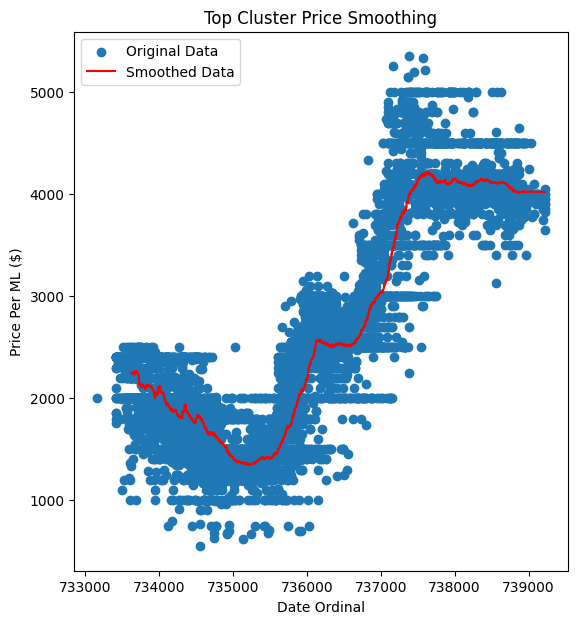

In [23]:
# Calculate the moving average for the 'Price Per ML ($)' column in both top and bottom datasets
window_size = 300  # Define the window size for the moving average

# Apply the moving average using the rolling window and mean function
zone_data_1A_top_sorted['Price_MA'] = zone_data_1A_top_sorted['Price Per ML ($)'].rolling(window=window_size).mean()
zone_data_1A_bottom_sorted['Price_MA'] = zone_data_1A_bottom_sorted['Price Per ML ($)'].rolling(window=window_size).mean()

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot for top cluster
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(zone_data_1A_top_sorted['Create_date_ordinal'], zone_data_1A_top_sorted['Price Per ML ($)'], label='Original Data')
plt.plot(zone_data_1A_top_sorted['Create_date_ordinal'], zone_data_1A_top_sorted['Price_MA'], label='Smoothed Data', color='red')
plt.title('Top Cluster Price Smoothing')
plt.xlabel('Date Ordinal')
plt.ylabel('Price Per ML ($)')
plt.legend()


